In [1]:
import tensorflow as tf
import numpy as np
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
import matplotlib.pyplot as plt

In [35]:
with open("data/songs/IrishSong.txt", "r") as file:
    IrishSong = file.read().splitlines()
IrishSong = list(map(str.strip, IrishSong))
IrishSong = list(map(str.lower, IrishSong))

In [36]:
def preprocessor(tokenizer, IrishSong):
    tokenizer.fit_on_texts(IrishSong)
    total_words = len(tokenizer.word_index) + 1
    input_sequences = []
    for line in IrishSong:
        tokenised_line = tokenizer.texts_to_sequences([line])[0] # token_list.shape = (1,len(line))
        for i in range(1,len(tokenised_line)):
            input_sequences.append(tokenised_line[:i+1])

    max_sequence_len = max(len(seq) for seq in input_sequences)
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

    xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
    ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # onehot encoding of labels
    
    return xs, ys, max_sequence_len, total_words

In [54]:
tokenizer.fit_on_texts(IrishSong)
total_words = len(tokenizer.word_index) + 1
input_sequences = []
for line in IrishSong:
    tokenised_line = tokenizer.texts_to_sequences([line])[0] # token_list.shape = (1,len(line))
    for i in range(1,len(tokenised_line)):
        input_sequences.append(tokenised_line[:i+1])

max_sequence_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # onehot encoding of labels



In [37]:
xs, ys, max_sequence_len, total_words = preprocessor(tokenizer, IrishSong)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="data/model-checkpoints/text-Generation/", save_weights_only=True, verbose=1)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
history = model.fit(xs, ys, epochs=500, verbose=1, callbacks=[checkpoint_callback])

Train on 453 samples
Epoch 1/500
448/453 [============================>.] - ETA: 0s - loss: 5.5683 - accuracy: 0.0112
Epoch 00001: saving model to data/text-Generation/
453/453 [==============================] - 3s 8ms/sample - loss: 5.5684 - accuracy: 0.0132
Epoch 2/500
416/453 [==========================>...] - ETA: 0s - loss: 5.5435 - accuracy: 0.0361
Epoch 00002: saving model to data/text-Generation/
453/453 [==============================] - 0s 573us/sample - loss: 5.5432 - accuracy: 0.0331
Epoch 3/500
416/453 [==========================>...] - ETA: 0s - loss: 5.4796 - accuracy: 0.0457
Epoch 00003: saving model to data/text-Generation/
453/453 [==============================] - 0s 561us/sample - loss: 5.4796 - accuracy: 0.0464
Epoch 4/500
416/453 [==========================>...] - ETA: 0s - loss: 5.3201 - accuracy: 0.0553
Epoch 00004: saving model to data/text-Generation/
453/453 [==============================] - 0s 430us/sample - loss: 5.2850 - accuracy: 0.0530
Epoch 5/500
352/4

In [35]:
model.load_weights("data/model-checkpoints/text-Generation/")

Text(0, 0.5, 'accuracy')

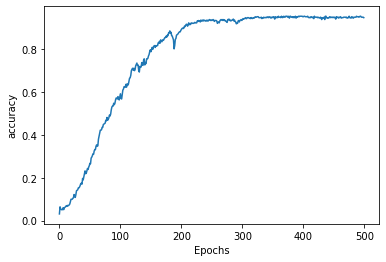

In [43]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [64]:
def create_poem(model, tokenizer, seed_text, next_words, reversed_word_index=None):
	if not reversed_word_index:
		reversed_word_index = {value:key for key,value in tokenizer.word_index.items()}

	for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = model.predict_classes(token_list, verbose=0)
		output_word = ""
		try:
			seed_text += " " + reversed_word_index[predicted[0]]
		except:
			pass
	print(seed_text)
	
	return reversed_word_index

In [66]:
reversed_word_index = create_poem(model, tokenizer, "Laurence went to dublin", 10)

Laurence went to dublin town of delight in the town of athy one town


the predictions dont seem great because after a few words it turns into jiberish

In [2]:
data = open("data/songs/Laurences_generated_poetry.txt").read().split("\n")
data = list(map(str.strip, data))

In [60]:
xs, ys, max_sequence_len, total_words = preprocessor(tokenizer, data)

In [61]:
embedding_dim = 100
num_epochs = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])
adam_optimiser = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimiser, metrics=["accuracy"])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="data/model-checkpoints/text-Generation2/", save_weights_only=True, verbose=1)

In [62]:
history = model.fit(xs, ys, epochs=num_epochs, verbose=1, callbacks=[checkpoint_callback])

Train on 12038 samples
Epoch 1/100
12032/12038 [============================>.] - ETA: 0s - loss: 6.6434 - accuracy: 0.0756
Epoch 00001: saving model to data/model-checkpoints/text-Generation2/
12038/12038 [==============================] - 7s 621us/sample - loss: 6.6428 - accuracy: 0.0756
Epoch 2/100
11936/12038 [============================>.] - ETA: 0s - loss: 5.7730 - accuracy: 0.1111
Epoch 00002: saving model to data/model-checkpoints/text-Generation2/
12038/12038 [==============================] - 4s 371us/sample - loss: 5.7703 - accuracy: 0.1116
Epoch 3/100
12000/12038 [============================>.] - ETA: 0s - loss: 4.9331 - accuracy: 0.1608
Epoch 00003: saving model to data/model-checkpoints/text-Generation2/
12038/12038 [==============================] - 4s 369us/sample - loss: 4.9328 - accuracy: 0.1610
Epoch 4/100
11936/12038 [============================>.] - ETA: 0s - loss: 4.0547 - accuracy: 0.2265 ETA: 0s - los
Epoch 00004: saving model to data/model-checkpoints/text-G

Text(0, 0.5, 'accuracy')

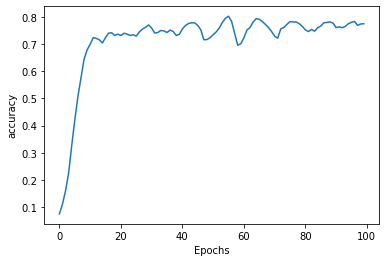

In [63]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [68]:
reversed_word_index = create_poem(model, tokenizer, "Laurence went to dublin", 100)

Laurence went to dublin town of delight in the town of athy one town of green around ballyjamesduff fashion free academy squall till first my room for erin go bragh i head so lead i oft times did more those bright as until you brother me who did will hear from below come easy on each breeze there will there we pepper on kilgary mountain near being like wine for else old skibbereen isle they were hearty heart she and fair maiden clearly my love in fray or gown loud you able to a huff of dungannon new both it was a trusty tree


When shall also try to train the model with tokenised characters instead of words. Shocking to know that the model can actually learn how to spell words and put together meaningful words. It does fail at grammatical structures however. I have a feeling CNNs would be useful for that but that's just speculation.
# Char-level NLP

In [10]:
data = open("data/songs/Laurences_generated_poetry.txt").read().split("\n")
data = list(map(str.strip, data))
text = ' '.join(data) # make sure your corpus has at least ~100k characters. ~1M is better
# len(text) = 68,998

In [18]:
alphabet="".join([chr(i) for i in range(32,127)])
chartokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True) # oov_token="<OOV>"
chartokenizer.fit_on_texts(text+alphabet)

In [19]:
sequence_length = 20
step = 3
total_chars = len(chartokenizer.word_index)
embedding_dim = 168
num_epochs = 100

# cut the text in semi-redundant sequences of maxlen characters
input_chars = []
next_char = []
for i in range(0, len(text) - sequence_length, step):
    input_chars.append(text[i : i + sequence_length])
    next_char.append(text[i + sequence_length])

In [20]:
print("Number of sequences:", len(input_chars))
print("input X  (input_chars)  --->   output y (next_char) ")
for i in range(5):
  print( input_chars[i],"   --->  ", next_char[i])

Number of sequences: 22993
input X  (input_chars)  --->   output y (next_char) 
Come all ye maidens     --->   y
e all ye maidens you    --->   n
ll ye maidens young     --->   a
ye maidens young and    --->    
maidens young and fa    --->   i


In [21]:
input_sequences = chartokenizer.texts_to_sequences(input_chars)
labels = chartokenizer.texts_to_sequences(next_char)
labels = list(map(lambda lst: lst[0], labels))
ys = tf.keras.utils.to_categorical(labels, num_classes=total_chars) 

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, embedding_dim, input_length=sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_chars, activation="softmax")
])
adam_optimiser = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam_optimiser, metrics=["accuracy"])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="data/model-checkpoints/text-Generation_char_lvl/", save_weights_only=True, verbose=1)

In [23]:
history = model.fit(np.array(input_sequences), ys, epochs=num_epochs, verbose=1, callbacks=[checkpoint_callback])

Train on 22993 samples
Epoch 1/100
22848/22993 [============================>.] - ETA: 0s - loss: 2.1603 - accuracy: 0.3669
Epoch 00001: saving model to data/model-checkpoints/text-Generation_char_lvl/
22993/22993 [==============================] - 11s 465us/sample - loss: 2.1596 - accuracy: 0.3672
Epoch 2/100
22976/22993 [============================>.] - ETA: 0s - loss: 1.8880 - accuracy: 0.4265
Epoch 00002: saving model to data/model-checkpoints/text-Generation_char_lvl/
22993/22993 [==============================] - 8s 335us/sample - loss: 1.8878 - accuracy: 0.4266
Epoch 3/100
22880/22993 [============================>.] - ETA: 0s - loss: 1.8142 - accuracy: 0.4432
Epoch 00003: saving model to data/model-checkpoints/text-Generation_char_lvl/
22993/22993 [==============================] - 8s 329us/sample - loss: 1.8151 - accuracy: 0.4431
Epoch 4/100
22848/22993 [============================>.] - ETA: 0s - loss: 1.7645 - accuracy: 0.4543
Epoch 00004: saving model to data/model-checkpo

Text(0, 0.5, 'accuracy')

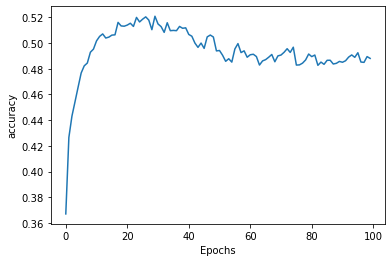

In [24]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [30]:
def predict_next(seed_text, reversed_word_index=None):
	returns = False
	if not reversed_word_index:
		returns = True
		reversed_word_index = {value:key for key,value in chartokenizer.word_index.items()}

	for _ in range(21):
		token_list = chartokenizer.texts_to_sequences([seed_text[-sequence_length:]])[0]
		token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
		predicted = model.predict_classes(token_list, verbose=0)
		output_word = ""
		try:
			seed_text += reversed_word_index[predicted[0]]
		except:
			pass
	print(seed_text)
	
	if returns:
		return reversed_word_index

In [31]:
test1 = "Come all ye maidens young and fair"
test2 = "Laurence went to dublin"
reversed_word_index = predict_next(test1)
predict_next(test2,reversed_word_index)

Come all ye maidens young and fair heart the said now t
Laurence went to dubling and i way soul be s
